In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
train = pd.read_csv('data/train.csv')

## Column definitions
| variable | Definition | key |
| --- | --- | --- |
| survived | survival | 0 = No, 1 = Yes |
| pclass | ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| age | age in years | |
| sibsp | # of siblings/spouses aboard the Titanic | | 
| parch | # of parents/children aboard the Titanic | | 
| ticket | Ticket number | | 
| fare | passenger fare | |
| cabin | cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southhampton | 


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
def clean_train(train: pd.DataFrame) -> pd.DataFrame:
    train_clean = (train
        .rename(columns={
            'PassengerId': 'passenger_id',
            'Survived': 'survived',
            'Pclass': 'class',
            'Name': 'name',
            'Sex': 'sex',
            'Age': 'age',
            'SibSp': 'sibling_spouse_count',
            'Parch': 'parent_child_count',
            'Ticket': 'ticket',
            'Fare': 'fare',
            'Cabin': 'cabin',
            'Embarked': 'embarked',
        })
    )
    return train_clean

In [24]:
train_clean = clean_train(train)

In [25]:
train_clean.head()

,passenger_id,survived,class,name,sex,age,sibling_spouse_count,parent_child_count,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train_clean.dtypes

passenger_id              int64
survived                  int64
class                     int64
name                     object
sex                      object
age                     float64
sibling_spouse_count      int64
parent_child_count        int64
ticket                   object
fare                    float64
cabin                    object
embarked                 object
dtype: object

In [ ]:
sns.theme

In [58]:
sns.set_theme(style='white')

<Axes: xlabel='age', ylabel='Count'>

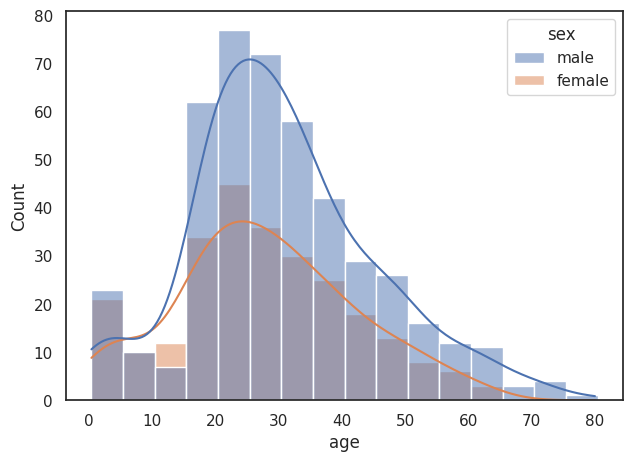

In [59]:
sns.histplot(data=train_clean, x='age', hue='sex', kde=True, binwidth=5)
# males are older than females

In [73]:
train_clean.isna().sum()
# a few columns have na values


passenger_id              0
survived                  0
class                     0
name                      0
sex                       0
age                     177
sibling_spouse_count      0
parent_child_count        0
ticket                    0
fare                      0
cabin                   687
embarked                  2
dtype: int64

In [79]:
train_clean.columns

Index(['passenger_id', 'survived', 'class', 'name', 'sex', 'age',
       'sibling_spouse_count', 'parent_child_count', 'ticket', 'fare', 'cabin',
       'embarked'],
      dtype='object')

In [82]:
(train_clean
    .assign(
        survived=lambda x: np.where(x['survived'] == 0, 'no', 'yes')
    )
)['survived'].value_counts()

survived
no     549
yes    342
Name: count, dtype: int64

In [83]:
train_clean['class'].value_counts()

class
3    491
1    216
2    184
Name: count, dtype: int64

In [140]:
# what percentage of people in each class survived?
(train_clean[['class', 'survived']]
    .groupby('class')['survived']
    .agg(['count', 'sum'])
    .reset_index()
    .rename(columns={'count': 'total_in_class', 'sum': 'survived'})
    .assign(
        survivaval_rate=lambda x: x['survived'] / x['total_in_class']
    )
)

,class,total_in_class,survived,survivaval_rate
0,1,216,136,0.629630
1,2,184,87,0.472826
2,3,491,119,0.242363
